In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
house=pd.read_csv('housing.csv')

In [3]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* Each row represents a Claifornia district with features for each district

In [5]:
house.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
house.loc[house.total_bedrooms.isna(),:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [7]:
house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [8]:
house.total_rooms.value_counts().sort_values(ascending=False)

1527.0     18
1613.0     17
1582.0     17
2127.0     16
1703.0     15
           ..
4294.0      1
11251.0     1
8745.0      1
5662.0      1
5639.0      1
Name: total_rooms, Length: 5926, dtype: int64

In [9]:
house.dropna(inplace=True)
house['rooms_per_house']=house.total_rooms/house.households

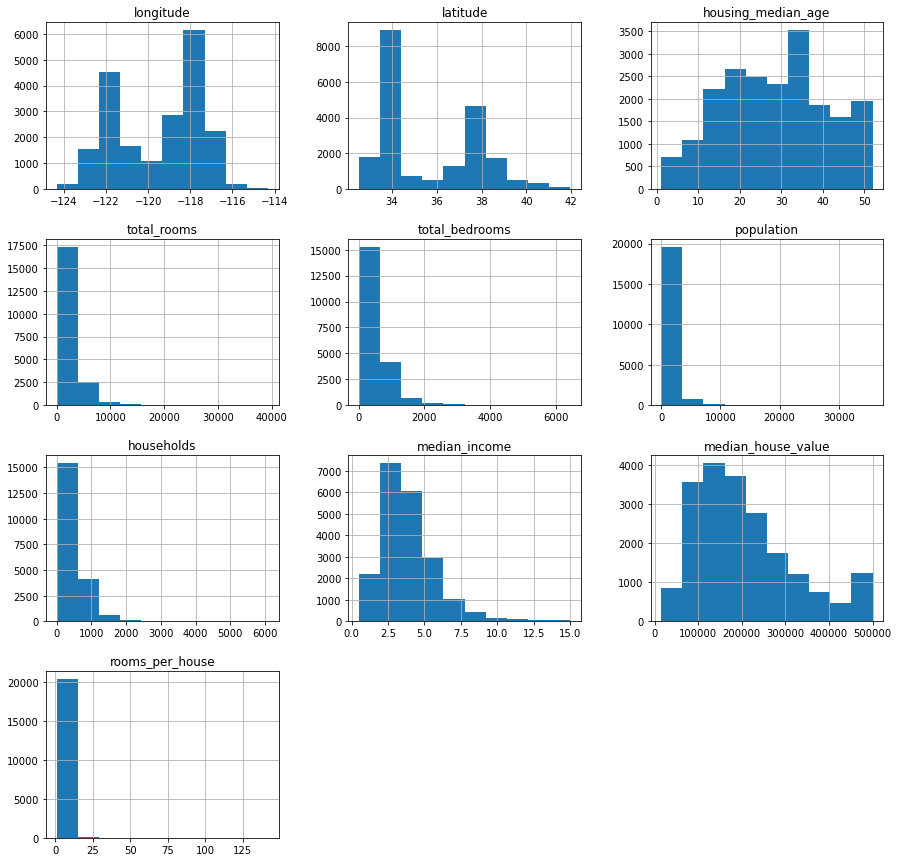

In [10]:
house.hist(figsize=(15,15))
plt.show()

<AxesSubplot:ylabel='rooms_per_house'>

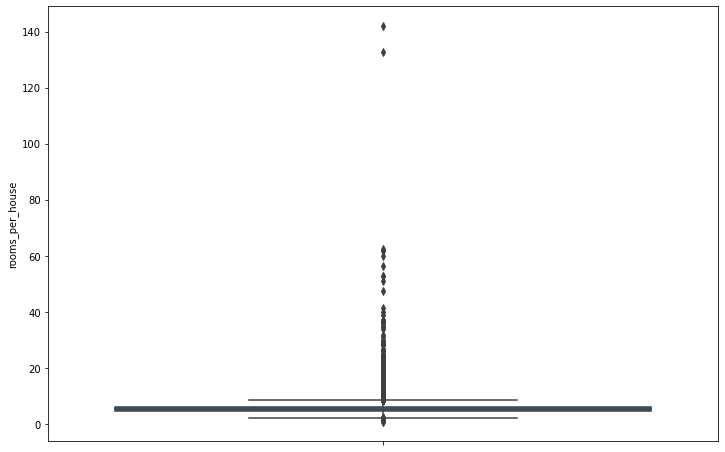

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(data=house,y='rooms_per_house')

In [12]:
house.rooms_per_house.sort_values(ascending=False).head(5)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
Name: rooms_per_house, dtype: float64

In [13]:
house['pop_per_household']=house.population.div(house.households)

In [14]:
house['bedrooms_per_room']=house.total_bedrooms.div(house.total_rooms)

In [15]:
house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
latitude,20433.0,35.633221,2.136348,32.540000,33.930000,34.260000,37.720000,41.950000
housing_median_age,20433.0,28.633094,12.591805,1.000000,18.000000,29.000000,37.000000,52.000000
total_rooms,20433.0,2636.504233,2185.269567,2.000000,1450.000000,2127.000000,3143.000000,39320.000000
total_bedrooms,20433.0,537.870553,421.385070,1.000000,296.000000,435.000000,647.000000,6445.000000
population,20433.0,1424.946949,1133.208490,3.000000,787.000000,1166.000000,1722.000000,35682.000000
households,20433.0,499.433465,382.299226,1.000000,280.000000,409.000000,604.000000,6082.000000
median_income,20433.0,3.871162,1.899291,0.499900,2.563700,3.536500,4.744000,15.000100
median_house_value,20433.0,206864.413155,115435.667099,14999.000000,119500.000000,179700.000000,264700.000000,500001.000000
rooms_per_house,20433.0,5.431344,2.482946,0.846154,4.441441,5.230769,6.052381,141.909091


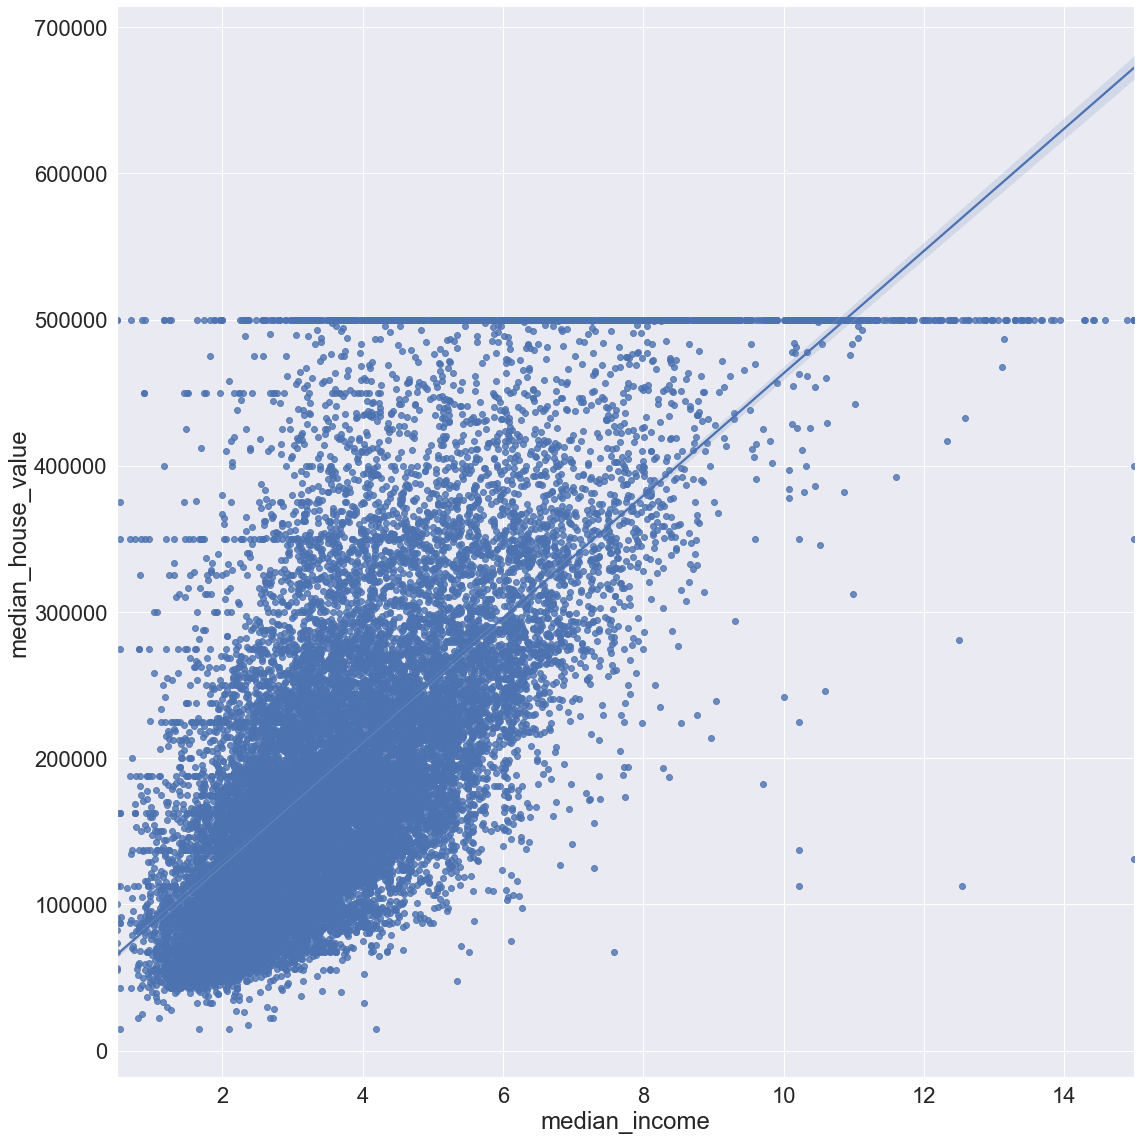

In [16]:
# Income versus median house value relationship
sns.set(font_scale=2)
sns.lmplot(data=house,x='median_income',y='median_house_value',height=16)
plt.show()

In [17]:
# Getting correlation between house value and other variables
corr_mat=house.corr()

In [23]:
corr_mat.loc['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
rooms_per_house       0.151344
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
pop_per_household    -0.023639
population           -0.025300
longitude            -0.045398
latitude             -0.144638
bedrooms_per_room    -0.255880
Name: median_house_value, dtype: float64

* <font size="4"> Looks like correlation between median house value and median icome is fairly high
* Would also look at including rooms per house
* Another varibale would be housing median age
* Higher number of bedrooms per room associated with lower prices </font>

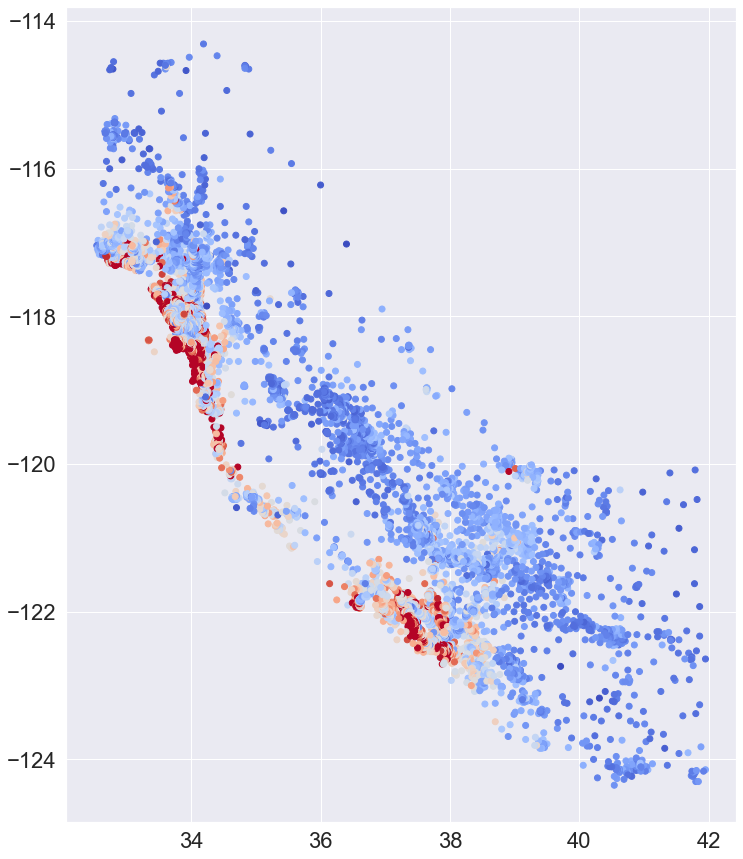

In [24]:
# Latitude and longitude with house value
plt.figure(figsize=(12,15))
plt.scatter(x=house.latitude,y=house.longitude,c=house.median_house_value,cmap='coolwarm')
plt.show()

* <font size='4'> Looks like the shape of California 
* Also looks like those that are closer to the Ocean are more valuable properties 
* This is a significant non-linear feature so we would probably want to run a non linear model </font>


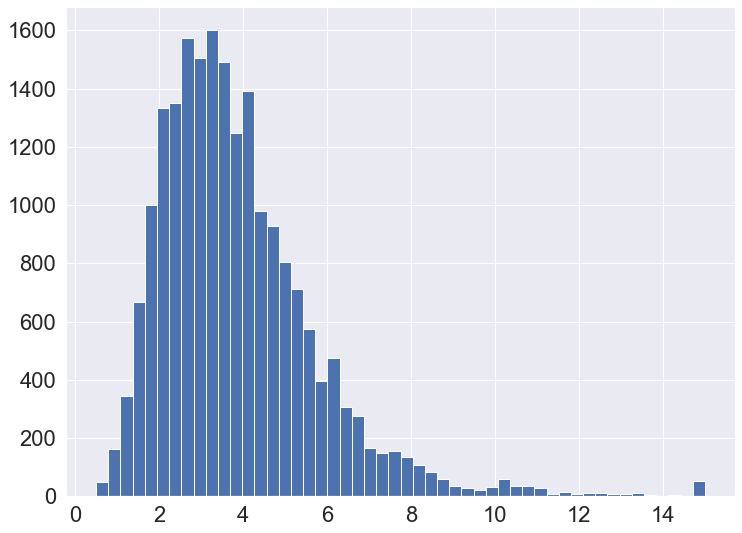

In [25]:
plt.figure(figsize=(12,9))
plt.hist(house.median_income,bins=50)
plt.show()

In [26]:
house['Income_cat']=pd.qcut(house.median_income,q=[0,0.25,0.50,0.75,0.95,1],labels=['Low','Below_Avg','Above_Avg','High','Very_high'])

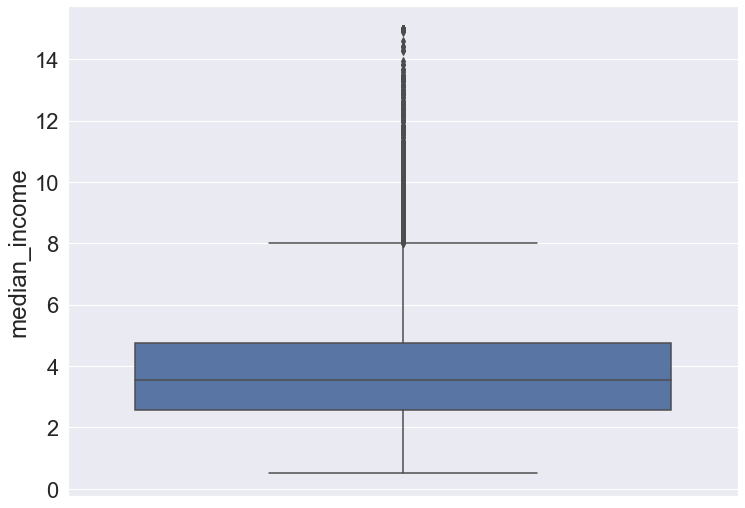

In [31]:
plt.figure(figsize=(12,9))
sns.boxplot(data=house,y='median_income')
plt.show()

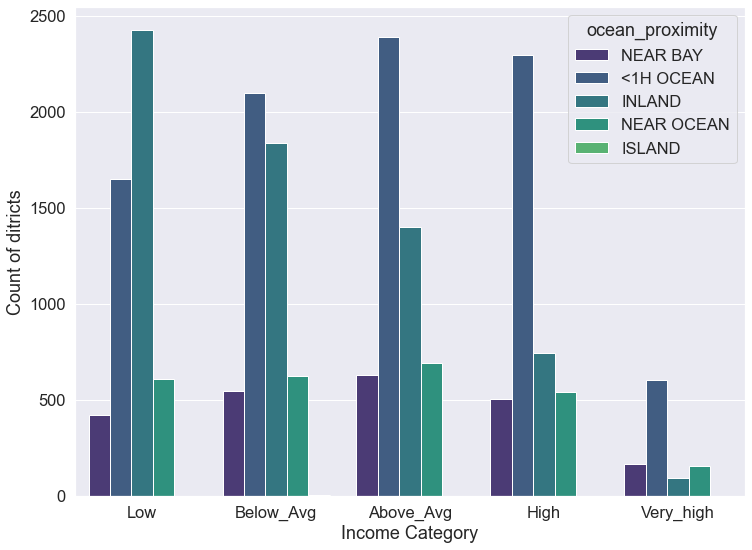

In [37]:
# Visualizing distribution by income category
sns.set(font_scale=1.5,palette='viridis')
plt.figure(figsize=(12,9))
sns.countplot(data=house,x='Income_cat',hue='ocean_proximity')
plt.xlabel('Income Category')
plt.ylabel('Count of ditricts')
plt.show()

In [62]:
# Creating a crosstab by Ocean proximity and Income category and get the avg median hose value
matrix=house.groupby(['ocean_proximity','Income_cat'])['median_house_value'].mean().unstack()
matrix

Income_cat,Low,Below_Avg,Above_Avg,High,Very_high
ocean_proximity,,,,,
<1H OCEAN,161337.076923,197236.013829,232278.358759,292208.766217,439784.235489
INLAND,84820.626650,115124.088283,147846.891351,208095.566622,347571.736842
ISLAND,450000.000000,363050.000000,NaN,NaN,NaN
NEAR BAY,155122.052133,220196.177656,261965.251582,322566.033663,451015.078788
NEAR OCEAN,148027.826514,208665.190096,255293.813584,337446.227778,468739.723270


In [63]:
matrix.drop(labels='ISLAND',inplace=True)

In [64]:
matrix=matrix.astype('int')

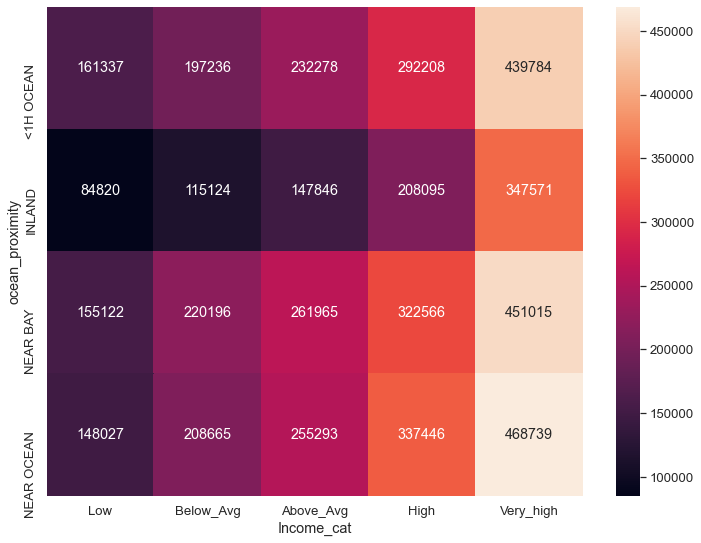

In [68]:
plt.figure(figsize=(12,9))
sns.set(font_scale=1.2)
sns.heatmap(matrix,annot=True,fmt='d')
plt.show()

### Feature engineering 1
* <font size="4"> Separate out the target variable as a labelled pandas series
* Drop the target column from the feature array 
* Many of the numerical features have different scales and this can distort ML algorithms </font>

In [70]:
labels=house.median_house_value
labels

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [72]:
features=house.drop(columns='median_house_value').copy()

In [73]:
features.select_dtypes('float')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,pop_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,2.123209,0.219892


In [78]:
import scipy.stats as stats

In [79]:
# Function to get the zscores
def z_score(df):
    df2=stats.zscore(df)
    return(df2)

In [86]:
feat1=features.select_dtypes('float').apply(z_score,axis=0)

In [89]:
feat1.describe().transpose().round(0)

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-0.0,1.0,-2.0,-1.0,1.0,1.0,3.0
latitude,20433.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,3.0
housing_median_age,20433.0,-0.0,1.0,-2.0,-1.0,0.0,1.0,2.0
total_rooms,20433.0,0.0,1.0,-1.0,-1.0,-0.0,0.0,17.0
total_bedrooms,20433.0,0.0,1.0,-1.0,-1.0,-0.0,0.0,14.0
population,20433.0,-0.0,1.0,-1.0,-1.0,-0.0,0.0,30.0
households,20433.0,0.0,1.0,-1.0,-1.0,-0.0,0.0,15.0
median_income,20433.0,0.0,1.0,-2.0,-1.0,-0.0,0.0,6.0
rooms_per_house,20433.0,-0.0,1.0,-2.0,-0.0,-0.0,0.0,55.0
pop_per_household,20433.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,119.0


### Feature Engineering part 2
* <font scale="4"> Typically ML algorithms cannot handle text data
* Therefore after scaling the numerical variables we need to create dummy variables for the text/cat data

In [97]:
# Lets get dummies for the ocean proximity feature. k-1 
dummies=pd.get_dummies(data=house.ocean_proximity,drop_first=True)

In [98]:
dummies2=pd.get_dummies(data=house.Income_cat,drop_first=True)

In [100]:
fnl=pd.concat([feat1,dummies,house.Income_cat],axis=1)
fnl

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,pop_per_household,bedrooms_per_room,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,Income_cat
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.625395,-0.049433,-1.146024,0,0,1,0,Very_high
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.324942,-0.092134,-0.987254,0,0,1,0,Very_high
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.150594,-0.025797,-1.440514,0,0,1,0,High
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.155467,-0.050162,-0.492925,0,0,1,0,High
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.342549,-0.085272,-0.706141,0,0,1,0,Above_Avg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-0.155420,-0.048949,0.199820,1,0,0,0,Low
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,0.274959,0.004912,0.037412,1,0,0,0,Low
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.090943,-0.071460,0.036808,1,0,0,0,Low
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-0.041013,-0.090853,0.118204,1,0,0,0,Low


### Splitting the data into train and test

In [139]:
test_size=0.2

In [140]:
X_test=fnl.sample(frac=test_size,random_state=123)

In [141]:
X_test.Income_cat.value_counts(normalize=True)

Above_Avg    0.252753
Below_Avg    0.250795
Low          0.249082
High         0.196966
Very_high    0.050404
Name: Income_cat, dtype: float64

In [142]:
X_test.drop(columns='Income_cat',inplace=True)

In [143]:
house.Income_cat.value_counts(normalize=True)

Above_Avg    0.250037
Low          0.250037
Below_Avg    0.249988
High         0.199922
Very_high    0.050017
Name: Income_cat, dtype: float64

* <font size="4"> Simple sampling works here.
* proportiions of income category are the same in test set and training set </font>

In [144]:
X_train=fnl.loc[~fnl.index.isin(X_test.index)].copy()

In [145]:
X_train.drop(columns='Income_cat',inplace=True)

In [146]:
y_train=labels.loc[X_train.index]
y_test=labels.loc[X_test.index]

In [147]:
y_train

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 16346, dtype: float64

### Training the ML Model
* Using Linear Regression

In [148]:
from sklearn.linear_model import LinearRegression

In [149]:
lm=LinearRegression(fit_intercept=True)

In [150]:
lm.fit(X_train,y_train)

LinearRegression()

In [128]:
lm.predict(X_test)

In [151]:
lm.score(X_train,y_train)

0.65390392625054

In [152]:
lm.score(X_test,y_test)

0.6542943163035067

In [153]:
pred=lm.predict(X_test)

In [158]:
comp=pd.DataFrame({'pred':pred,'True_val':y_test}).astype('int')

In [161]:
comp

,pred,True_val
14354,227272,101800
12908,121397,213000
19545,85863,58800
12188,147808,111300
14786,247982,174100
...,...,...
10262,292122,272200
3614,186974,175900
19296,242689,215900
5826,269906,326100


In [163]:
abs_diff=comp.True_val.sub(comp.pred).abs()

In [164]:
abs_diff.mean()

48263.287252263275

In [18]:
def corr_test(series1,series2,stat,sims):
    rep=np.empty(sims)
    for i in range(sims):
        inds=np.random.choice(series1.index,size=len(series1.index))
        rep[i]=stat(series1[inds],series2[inds])[0,1]
    return(rep)

In [19]:
house=pd.read_csv('housing.csv')

In [20]:
matrix=house.corr()

In [21]:
matrix.loc[:,'median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [22]:
rep=corr_test(house.median_income,house.median_house_value,np.corrcoef,1000)
np.percentile(rep,[2.5,97.5]).round(3)

array([0.679, 0.696])

Text(0.697, 100, 'High 95 CI')

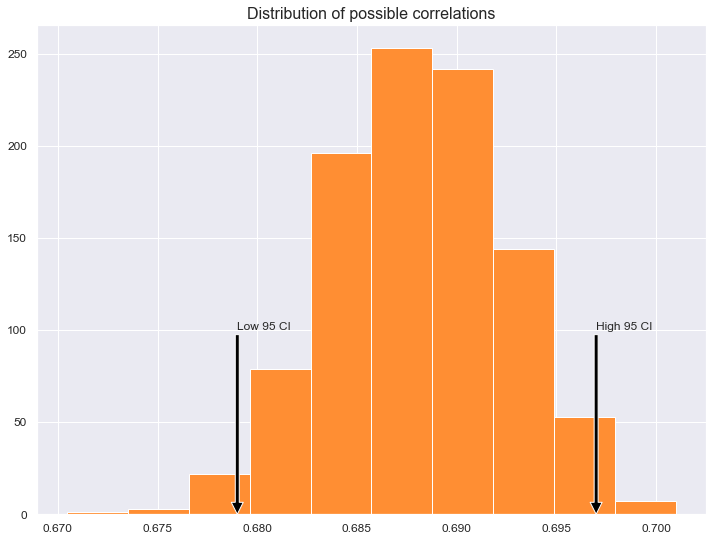

In [23]:
plt.figure(figsize=(12,9))
_=plt.hist(rep,color='#FF8E33')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of possible correlations',fontsize=16)
plt.annotate('Low 95 CI',(0.679,0),xytext=(0.679,100),arrowprops=dict(facecolor='black'),fontsize=12)
plt.annotate('High 95 CI',(0.697,0),xytext=(0.697,100),arrowprops=dict(facecolor='black'),fontsize=12)

In [36]:
inds

array([13740, 19395,  2521, ...,  3784,  3185, 16605], dtype=int64)